# Exercícios

1. Escolha uma imagem colorida na internet e exiba os seguintes histogramas, utilizando `plt.subplot(2, 1, x)`:
  * Dos três canais (**<font color="red">R</font>**, **<font color="green">G</font>** e **<font color="blue">B</font>**) **na mesma janela** (isto é, todas em `x = 1`);
  * Em escala de cinza utilizando um dos três métodos vistos em aulas anteriores (em `x = 2`).

Lembrando:
* **Lightness**: $$\frac{max(r, g, b) + min(r, g, b))}{2}$$
* **Average**: $$\frac{r + g + b}{3}$$
* **Luminosity**: $$0.2126 \times r + 0.7152 \times g + 0.0722 \times b$$

#### Importando bibliotecas e carregando a imagem:

In [5]:
import numpy as np  # NumPy para operacoes numericas
from PIL import Image  # PIL para manipulacao de imagens
import matplotlib.pyplot as plt  # Matplotlib para plotagem de graficos

saturn = np.array(Image.open("saturn.png"))

#### Método Lightness:

In [7]:
def lightness(img):
    # Calculando os valores máximos e mínimos para cada canal de cor (R, G, B) ao longo do eixo 2 (canal de cor)
    max_values = np.max(img, axis=2)
    min_values = np.min(img, axis=2)
    
    # A luminosidade é a média entre o valor máximo e mínimo dos canais de cor (R, G, B)
    light = ((max_values + min_values) / 2).astype(np.uint8)
    
    return light

#### Método Average:

In [8]:
def average(img):
    avg = ((img[:,:,0] + 
            img[:,:,1] + 
            img[:,:,2])/3).astype(np.uint8)
   
    return avg

#### Método Luminosity:

In [9]:
def luminosity(img):
    # Aplicando a fórmula de conversão para escala de cinza em cada canal de cor (R, G, B)
    res = (img[:,:,0] * 0.2126 + 
           img[:,:,1] * 0.7152 + 
           img[:,:,2] * 0.0722).astype(np.uint8)
    
    return res

#### Exibindo imagens pelos métodos greyscale:

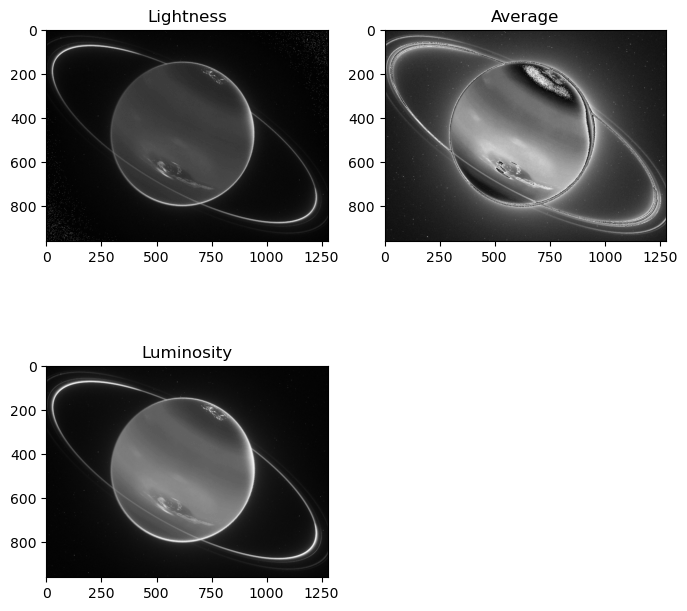

In [16]:
saturn_light = lightness(saturn)
saturn_avg = average(saturn)
saturn_lumin = luminosity(saturn)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Lightness')
plt.imshow(saturn_light, cmap="gray")
plt.subplot(2,2,2)
plt.title('Average')
plt.imshow(saturn_avg, cmap="gray")
plt.subplot(2,2,3)
plt.title('Luminosity')
plt.imshow(saturn_lumin, cmap="gray")

### Exibindo histogramas:

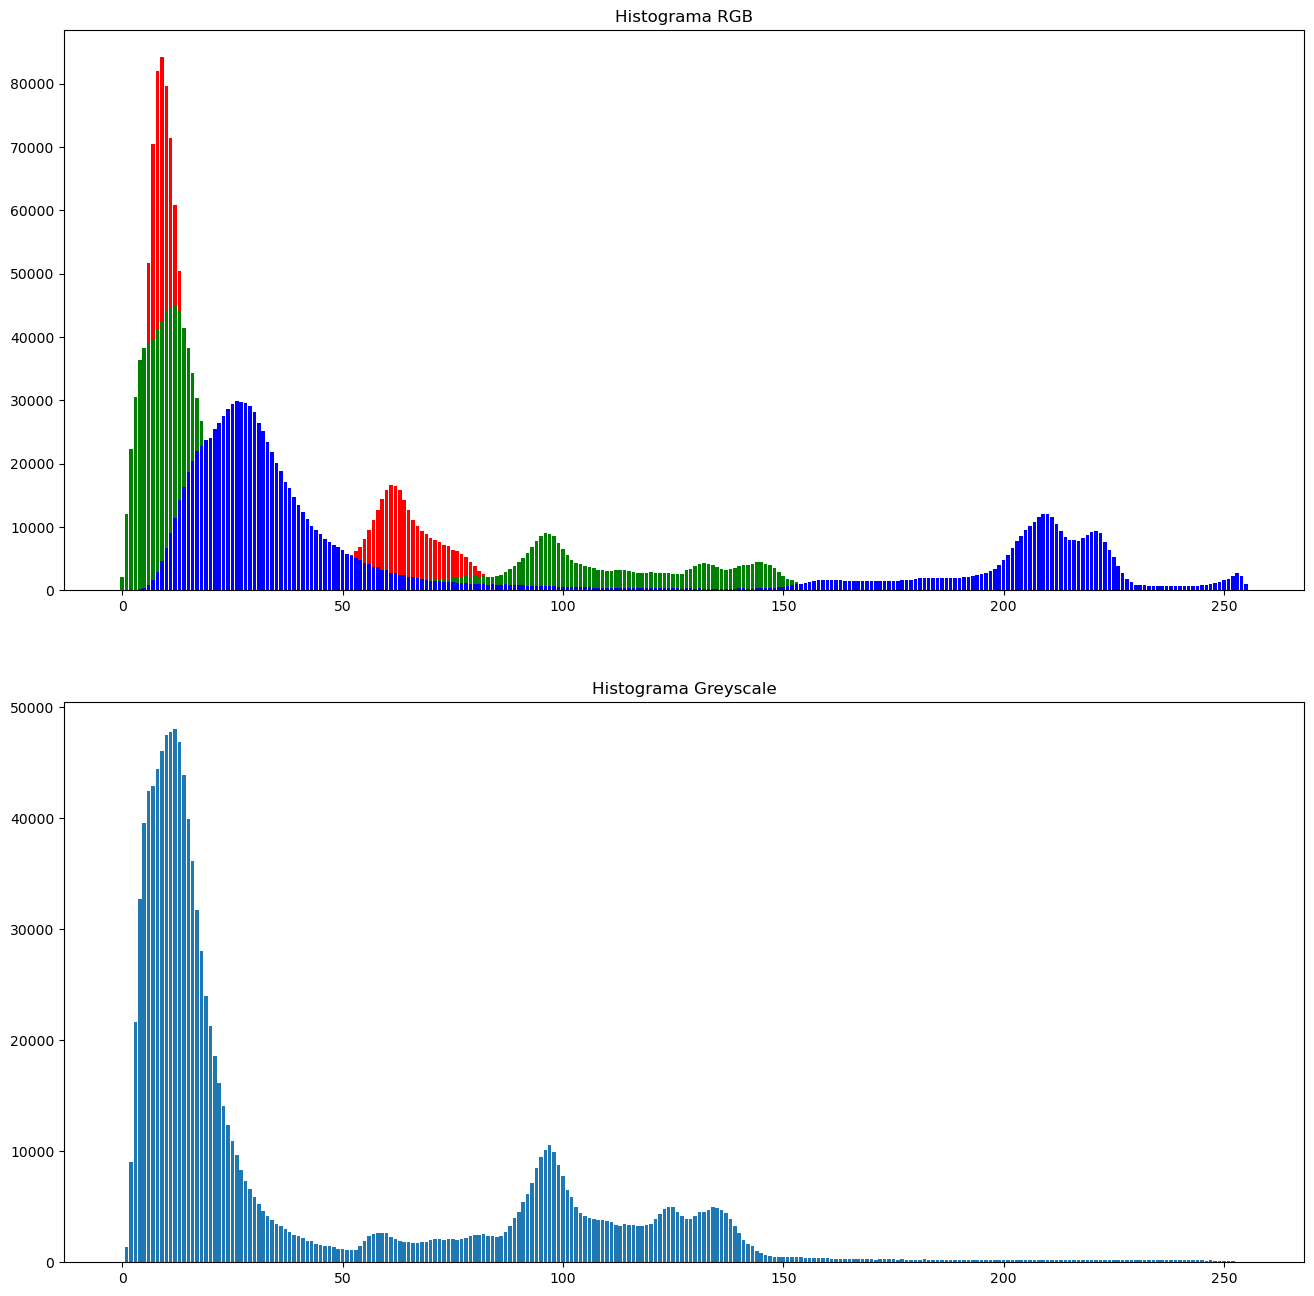

In [41]:
def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram(img_rbg, img_grey):
    histogram_r = histogram_gray(img_rbg[:, :, 0])
    histogram_g = histogram_gray(img_rbg[:, :, 1])
    histogram_b = histogram_gray(img_rbg[:, :, 2])
    
    plt.figure(figsize=(16,16))
    plt.subplot(2, 1, 1)
    plt.title('Histograma RGB')
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')
   
    histogram = histogram_gray(img_grey)
    plt.subplot(2, 1, 2)
    plt.title('Histograma Greyscale')
    plt.bar(range(256), histogram)
    
    
show_histogram(saturn,saturn_lumin)

2. Escolha uma imagem em grayscale, de preferência com baixo contraste, e aplique nela uma das duas abordagens de equalização.

In [52]:
def equaliza_tecnica1(image):
    # Calcula o histograma da imagem
    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0,256))
    
    # Calcula a função densidade cumulativa (FDC)
    fdc = np.cumsum(histogram)
    
    # Encontra o valor mínimo da FDC que não seja zero
    fdc_min = np.min(fdc[np.nonzero(fdc)])
    
    # Obtém as dimensões da imagem
    M, N = image.shape
    
    # Aplica a técnica de equalização
    new_image = np.round((fdc[image] - fdc_min) / ((M * N) - fdc_min) * 255)
    
    return new_image.astype(np.uint8)

Text(0.5, 1.0, 'Equalizada')

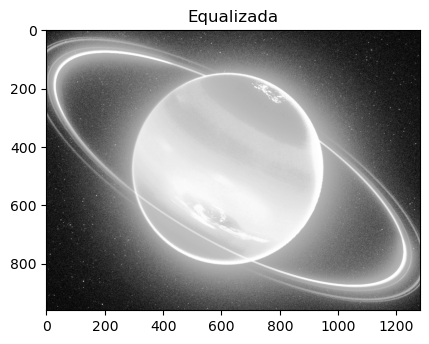

In [53]:
saturn_eq1 = equaliza_tecnica1(saturn_lumin)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(saturn_eq1, cmap='gray')
plt.title('Equalizada - técnica 1:')


In [54]:
def equaliza_tecnica2(image):
    # Calcula o histograma da imagem
    histogram, _ = np.histogram(image.flatten(), bins=256, range=(0,256))
    
    # Calcula a função densidade cumulativa normalizada (FDC)
    fdc_normalized = np.cumsum(histogram) / np.sum(histogram)
    
    # Aplica a técnica de equalização
    new_image = np.floor(255 * fdc_normalized[image])
    
    return new_image.astype(np.uint8)

Text(0.5, 1.0, 'Equalizada - técnica 2:')

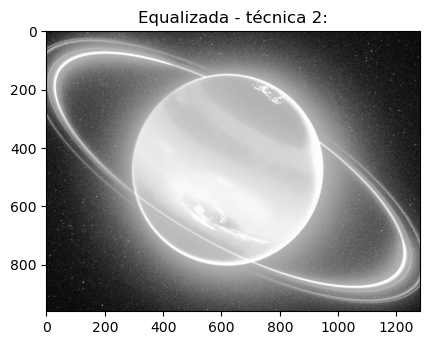

In [55]:
saturn_eq2 = equaliza_tecnica2(saturn_lumin)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(saturn_eq2, cmap='gray')
plt.title('Equalizada - técnica 2:')